# Instacart Final Report - Part 1

## Table of Contents:
##### 01 - Importing Libraries
##### 02 - Importing Data
##### 03 - Data Security Considerations
##### 04 - Regional Segmentation
##### 05 - Creating Exclusion Flag
##### 06 - Customer Profiling
###### ------ 06.01 - Age
###### ------ 06.02 - Income
###### ------ 06.03 - Certain Departments
###### ------ 06.04 - Number of Dependants
##### 07 - Customer Profile Visualizations
###### ------ 07.01 - Age
###### ------ 07.02 - Income
###### ------ 07.03 - Products
###### ------ 07.04 - Number of Dependants
##### 08 - Customer-Profile (Mean, Max & Min)
##### 09 - Additional Visualizations - in part 2


### 01. Import Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 02. Importing Data

In [2]:
# path shortcut
path = r'C:\Users\georg\Documents\2025-02-05 Instacart Basket Analysis'

In [3]:
# import dataset
df_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '2025.02.13_Data.pkl'))

### 03. Data Security Considerations

#### The dataset contains a lot of PII. The data contains customer first & last names as well as their ages and address (State).

### 04. Regional Segmentation

In [4]:
# defining Northeast States
northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [5]:
# defining Midwest States
midwest_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [6]:
# defining South States
south_states = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [7]:
# defining West States
west_states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [8]:
# creating the reion column
df_data.loc[df_data['state'].isin(northeast_states), 'region'] = 'Northeast'
df_data.loc[df_data['state'].isin(midwest_states), 'region'] = 'Midwest'
df_data.loc[df_data['state'].isin(south_states), 'region'] = 'South'
df_data.loc[df_data['state'].isin(west_states), 'region'] = 'West'

In [9]:
df_data.head(10)

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,date_joined,n_dependants,family_status,income,region
0,0,0,2539329,1,1,2,8,NaN,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,0,0,2539329,1,1,2,8,NaN,14084,2,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,0,0,2539329,1,1,2,8,NaN,12427,3,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,0,0,2539329,1,1,2,8,NaN,26088,4,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,0,0,2539329,1,1,2,8,NaN,26405,5,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
5,1,1,2398795,1,2,3,7,15.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
6,1,1,2398795,1,2,3,7,15.0,10258,2,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
7,1,1,2398795,1,2,3,7,15.0,12427,3,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
8,1,1,2398795,1,2,3,7,15.0,13176,4,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
9,1,1,2398795,1,2,3,7,15.0,26088,5,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [10]:
# Checking to see if theres any missing data
df_data['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [12]:
# creating crosstab to study spending habits
crosstab = pd.crosstab(df_data['region'], df_data['spending_flag'], dropna = False)

In [13]:
# copying crosstab to excel
crosstab.to_clipboard()

In [14]:
# sorting crosstab by highspender col
crosstab = crosstab.sort_values('High Spender', ascending = False)

In [15]:
crosstab

spending_flag,High Spender,Low Spender
region,,
South,209691,10582194
West,160354,8132559
Midwest,155975,7441350
Northeast,108225,5614511


In [16]:
# creating a % high spender col
crosstab['% High Spender'] = crosstab['High Spender'] / (crosstab['High Spender'] + crosstab['Low Spender'])

In [17]:
# changing the format of the new col to %
crosstab['% High Spender'] = crosstab['% High Spender'].map('{:.2%}'.format)
crosstab

spending_flag,High Spender,Low Spender,% High Spender
region,,,
South,209691,10582194,1.94%
West,160354,8132559,1.93%
Midwest,155975,7441350,2.05%
Northeast,108225,5614511,1.89%


#### If we just look at numbers, the South region had the largest number of highspenders.
#### But if we actually consider the percentage of high spenders in the whole region, we notice that all regions had close to 2% of high spenders

### 05. Creating an Exclusion Flag

In [18]:
# assigning Exclusion Flag
df_data.loc[df_data['max_order'] < 5, 'exclusion_flag'] = 'low activity customer'

In [19]:
df_data.loc[df_data['max_order'] >= 5, 'exclusion_flag'] = 'high activity customer'

In [20]:
df_data['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
high activity customer    30964564
low activity customer      1440295
Name: count, dtype: int64

In [21]:
# exclude low-activity customers from data
df_data_2 = df_data[df_data['exclusion_flag'] == 'high activity customer']

In [22]:
# making sure the right number of rows were deleted
df_data_2.shape

(30964564, 38)

#### number of rows = the number of high activity customers

In [26]:
# exporting new data set
df_data_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '2025-02-15_High_activity_cust.pkl'))

### 06. Customer Profiling

#### 06.01 Age

In [27]:
# figuring out the youngest customer's age
df_data_2['age'].min()

18

In [28]:
# creating age group variable
df_data_2.loc[df_data_2['age'] <= 29, 'age_group'] = 'Young Adult'

C:\Users\georg\AppData\Local\Temp\ipykernel_8716\2492916376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_2.loc[df_data_2['age'] <= 29, 'age_group'] = 'Young Adult'


In [29]:
df_data_2.loc[(df_data_2['age'] > 29) & (df_data_2['age'] <= 39), 'age_group'] = 'Adult'

In [30]:
df_data_2.loc[(df_data_2['age'] > 39) & (df_data_2['age'] <= 59), 'age_group'] = 'Middle-Aged Adult'

In [31]:
df_data_2.loc[df_data_2['age'] > 59, 'age_group'] = 'Senior'

In [32]:
df_data_2['age_group'].value_counts(dropna = False)

age_group
Senior               10574504
Middle-Aged Adult     9724950
Young Adult           5817603
Adult                 4847507
Name: count, dtype: int64

#### 06.02 Income

In [33]:
# creating Income level variable
df_data_2.loc[df_data_2['income'] <= 56600, 'income_level'] = 'Low Income'

C:\Users\georg\AppData\Local\Temp\ipykernel_8716\2225267557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_2.loc[df_data_2['income'] <= 56600, 'income_level'] = 'Low Income'


In [34]:
df_data_2.loc[(df_data_2['income'] > 56600) & (df_data_2['income'] <= 169800), 'income_level'] = 'Middle Income'

In [35]:
df_data_2.loc[df_data_2['income'] > 169800, 'income_level'] = 'High Income'

In [36]:
df_data_2['income_level'].value_counts(dropna = False)

income_level
Middle Income    25729841
Low Income        4883273
High Income        351450
Name: count, dtype: int64

#### 06.03 Certain Departments

In [37]:
df_data_2.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'order_id', 'user_id', 'order_number',
       'order_day_of_week', 'time_of_order', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge',
       'price_range_loc', 'busiest_day', 'day_activity_level',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'medain_days_since_last_order',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'family_status', 'income',
       'region', 'exclusion_flag', 'age_group', 'income_level'],
      dtype='object')

#### we have the department_id, but we dont have the department name in the table

In [38]:
# importing departments dataset
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [39]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [40]:
# renaming unnamed col
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [41]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [42]:
# merging the two tables
df_data_3 = df_data_2.merge(df_dept, on = 'department_id')

In [43]:
df_dept.value_counts(dropna = False)

department_id  department     
1              frozen             1
12             meat seafood       1
20             deli               1
19             snacks             1
18             babies             1
17             household          1
16             dairy eggs         1
15             canned goods       1
14             breakfast          1
13             pantry             1
11             personal care      1
2              other              1
10             bulk               1
9              dry goods pasta    1
8              pets               1
7              beverages          1
6              international      1
5              alcohol            1
4              produce            1
3              bakery             1
21             missing            1
Name: count, dtype: int64

In [44]:
# creating dept_category col
df_data_3.loc[df_data_3['department_id'].isin([4, 12, 20]), 'dept_category'] = 'Fresh Food'
df_data_3.loc[df_data_3['department_id'].isin([1, 9, 10, 13, 15]), 'dept_category'] = 'Frozen & Pantry'
df_data_3.loc[df_data_3['department_id'].isin([3, 14, 19]), 'dept_category'] = 'Snacks & Breakfast'
df_data_3.loc[df_data_3['department_id'].isin([11, 17]), 'dept_category'] = 'Household & Personal Care'
df_data_3.loc[df_data_3['department_id'].isin([8, 18]), 'dept_category'] = 'Baby & Pet Care'
df_data_3.loc[df_data_3['department_id'].isin([2, 21]), 'dept_category'] = 'Other'
df_data_3.loc[df_data_3['department_id'] == 16, 'dept_category'] = 'Dairy & Eggs'
df_data_3.loc[df_data_3['department_id'] == 6, 'dept_category'] = 'International Foods'
df_data_3.loc[df_data_3['department_id'] == 5, 'dept_category'] = 'Alcohol'
df_data_3.loc[df_data_3['department_id'] == 7, 'dept_category'] = 'Beverages'

In [45]:
df_data_3['dept_category'].value_counts(dropna = False)

dept_category
Fresh Food                   10757888
Frozen & Pantry               5772097
Dairy & Eggs                  5177182
Snacks & Breakfast            4558084
Beverages                     2571901
Household & Personal Care     1124163
Baby & Pet Care                503452
International Foods            255991
Alcohol                        144627
Other                           99179
Name: count, dtype: int64

#### 06.04 Number of Dependents

In [46]:
# creating dependents variable column
df_data_3.loc[df_data_3['n_dependants'] > 0, 'has_dependants'] = 'Has Dependants'

In [47]:
df_data_3.loc[df_data_3['n_dependants'] == 0, 'has_dependants'] = 'No Dependants'

In [48]:
df_data_3['has_dependants'].value_counts(dropna = False)

has_dependants
Has Dependants    23224883
No Dependants      7739681
Name: count, dtype: int64

### 07. Customer Profile Visualizations

#### 07.01 Age

Text(0, 0.5, '')

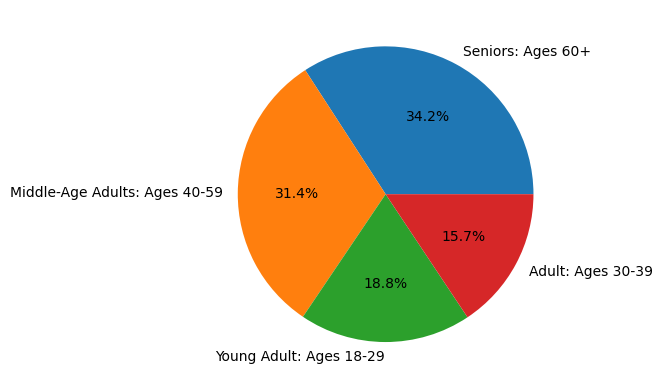

In [49]:
# Pie Chart showing diff age groups
age_group_pie = df_data_3['age_group'].value_counts()
age_group_pie = age_group_pie.plot.pie(autopct='%1.1f%%', labels = ['Seniors: Ages 60+', 'Middle-Age Adults: Ages 40-59', 'Young Adult: Ages 18-29', 'Adult: Ages 30-39'])

plt.ylabel('')

In [50]:
df_data_3['age_group'].value_counts(dropna = False)

age_group
Senior               10574504
Middle-Aged Adult     9724950
Young Adult           5817603
Adult                 4847507
Name: count, dtype: int64

In [51]:
# export pie
age_group_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_pie_chart.png'), dpi = 300, bbox_inches = 'tight')

([<matplotlib.axis.YTick at 0x1f0045240e0>,
 [Text(0, 0, '0'),
  Text(0, 2000000, '2000000'),
  Text(0, 4000000, '4000000'),
  Text(0, 6000000, '6000000'),
  Text(0, 8000000, '8000000'),
  Text(0, 10000000, '10000000')])

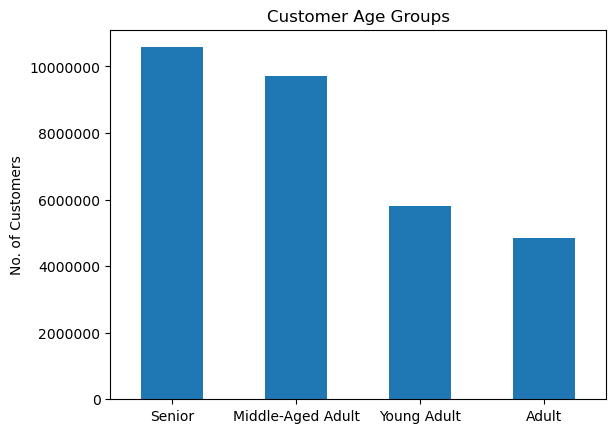

In [52]:
# Bar chart showing the diff age groups
bar_age_group = df_data_3['age_group'].value_counts().plot.bar()

# adding title
plt.title('Customer Age Groups')
# formatting x-axis
plt.xlabel('')
plt.xticks(rotation = 0)
# formatting y-axis
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0, 12000000, 2000000),
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 12000000, 2000000)])

In [53]:
# exporting bar chart
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'),dpi = 300, bbox_inches = 'tight')

#### 07.02 Income

(array([0, 1, 2]),
 [Text(0, 0, 'Middle Income'),
  Text(1, 0, 'Low Income'),
  Text(2, 0, 'High Income')])

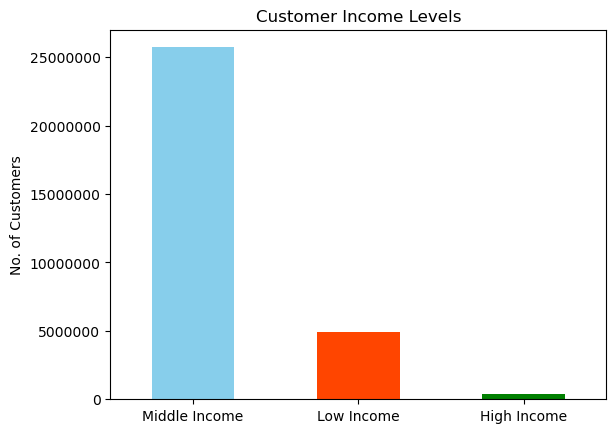

In [54]:
# bar chart showign the diff income levels
bar_income_level = df_data_3['income_level'].value_counts().plot.bar(color = ['skyblue', 'orangered', 'green'])

# Adding Title
plt.title('Customer Income Levels')
# Formatting Y-Axis
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0, 30000000, 5000000),
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 30000000, 5000000)])
# Formatting X-Axis
plt.xlabel('')
plt.xticks(rotation = 0)

In [55]:
# exporting bar chart
bar_income_level.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_level.png'),dpi = 300, bbox_inches = 'tight')

#### 07.03 Products

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Fresh Food'),
  Text(1, 0, 'Frozen & Pantry'),
  Text(2, 0, 'Dairy & Eggs'),
  Text(3, 0, 'Snacks & Breakfast'),
  Text(4, 0, 'Beverages'),
  Text(5, 0, 'Household & Personal Care'),
  Text(6, 0, 'Baby & Pet Care'),
  Text(7, 0, 'International Foods'),
  Text(8, 0, 'Alcohol'),
  Text(9, 0, 'Other')])

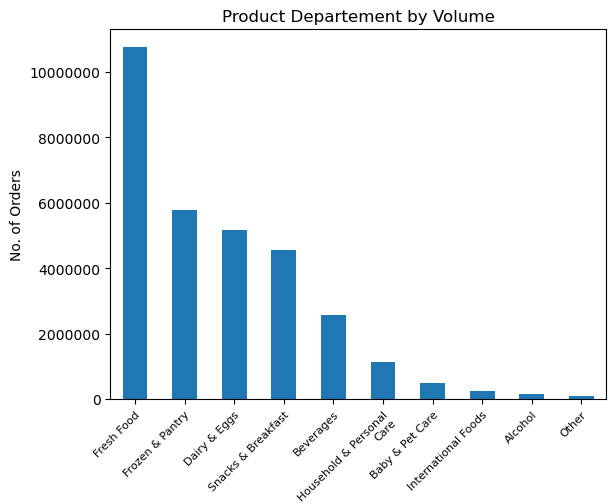

In [56]:
# creating a bar chart

bar_products = df_data_3['dept_category'].value_counts().plot.bar()

# Adding Title
plt.title('Product Departement by Volume')
# Formatting Y-Axis
plt.ylabel('No. of Orders')
plt.yticks(np.arange(0, 12000000, 2000000),
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 12000000, 2000000)])
# Formatting X-Axis
plt.xlabel('Departments')
plt.xticks(rotation = 45, ha = 'right', wrap = True, fontsize = 8)


In [57]:
# exporting bar chart
bar_products.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_products.png'),dpi = 300, bbox_inches = 'tight')

#### 07.04 Number of Dependents

Text(0, 0.5, '')

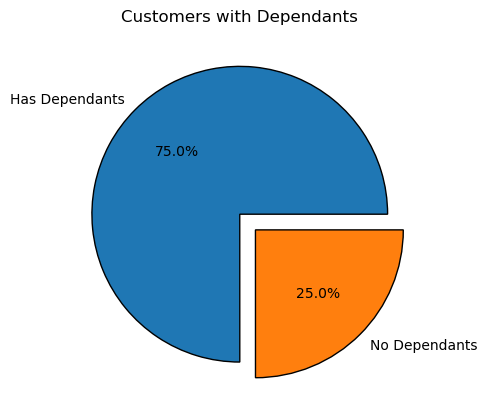

In [58]:
# Pie Chart showing diff age groups
dependents_pie = df_data_3['has_dependants'].value_counts()
dependents_pie = dependents_pie.plot.pie(
    autopct='%1.1f%%', labels = ['Has Dependants', 'No Dependants'],
    explode = [0, 0.15], wedgeprops = {'edgecolor' : 'black'})

# formatting
plt.title('Customers with Dependants')
plt.ylabel('')

In [59]:
# exporting pie chart
dependents_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_dependants.png'),dpi = 300, bbox_inches = 'tight')

### 08. Customer-Profile Mean, Max and Min 

In [60]:
# creating a new col showing order totals
df_order_totals = df_data_3.groupby(['user_id', 'order_number'])['prices'].sum().reset_index()
df_order_totals.rename(columns={'prices': 'order_total'}, inplace=True)

In [61]:
# merging this col into data_3
df_data_3 = df_data_3.merge(df_order_totals, on=['user_id', 'order_number'], how='left')

In [64]:
# summarizing customer behavior by calculating the mean, max and min of order number and amount spent
customer_agg = df_data_3.groupby(['age_group', 'income_level', 'has_dependants']).agg({
    'order_number': ['max', 'mean', 'min'], 
    'order_total': ['max', 'mean', 'min'] 
}).reset_index()

In [65]:
customer_agg

age_group   income_level  has_dependants order_number             \
                                                              max       mean   
0               Adult    High Income  Has Dependants           99  19.424291   
1               Adult    High Income   No Dependants           86  17.326277   
2               Adult     Low Income  Has Dependants           99  17.346423   
3               Adult     Low Income   No Dependants           99  17.386800   
4               Adult  Middle Income  Has Dependants           99  18.159148   
5               Adult  Middle Income   No Dependants           99  18.079835   
6   Middle-Aged Adult    High Income  Has Dependants           99  19.326119   
7   Middle-Aged Adult    High Income   No Dependants           99  22.945009   
8   Middle-Aged Adult     Low Income  Has Dependants           99  16.535097   
9   Middle-Aged Adult     Low Income   No Dependants           99  17.319525   
10  Middle-Aged Adult  Middle Income  Has Dependants           99  17.848461   
11  Middle-Aged Adult  Middle Income   No Dependants           99  18.151233   
12             Senior    High Income  Has Dependants           99  19.678748   
13             Senior    High Income   No Dependants           99  20.068513   
14             Senior     Low Income  Has Dependants           99  16.864405   
15             Senior     Low Income   No Dependants           99  16.790080   
16             Senior  Middle Income  Has Dependants           99  17.817750   
17             Senior  Middle Income   No Dependants           99  18.094682   
18        Young Adult    High Income  Has Dependants           99  18.853111   
19        Young Adult    High Income   No Dependants           58  16.994148   
20        Young Adult     Low Income  Has Dependants           99  17.254659   
21        Young Adult     Low Income   No Dependants           99  17.424543   
22        Young Adult  Middle Income  Has Dependants           99  18.052476   
23        Young Adult  Middle Income   No Dependants           99  17.742346   

       order_total                   
   min         max        mean  min  
0    1       669.3  147.028167  0.0  
1    1       435.8  140.990947  0.0  
2    1       829.2  111.809784  1.0  
3    1       561.6  110.630120  1.0  
4    1       775.7  128.454856  0.0  
5    1       584.6  125.562150  0.0  
6    1      1047.4  135.371269  0.0  
7    1       571.9  136.501736  2.1  
8    1       667.8   88.804984  1.0  
9    1       712.0   86.347440  1.0  
10   1      1092.2  126.181527  0.0  
11   1       690.6  125.043615  0.0  
12   1       566.8  133.063602  0.0  
13   1       579.4  123.249509  0.0  
14   1       539.9   86.425605  1.0  
15   1       875.0   87.515008  1.0  
16   1       787.0  125.569945  0.0  
17   1       736.7  126.241578  1.0  
18   1       497.1  120.581317  1.0  
19   1       621.2  155.838856  3.7  
20   1       842.1  109.960187  1.0  
21   1       593.3  110.392077  1.0  
22   1       750.3  126.636909  0.0  
23   1       624.3  125.947204  1.0

In [66]:
customer_agg.to_clipboard()

### 09. Additional Visualizations

In [69]:
#exporting data_3

df_data_3.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '2025.02.16_Data.pkl'))